In [1]:
import sys
import numpy as np
from matplotlib import pyplot as plt


sys.path.append('../')

from BGS import BGS
from FileEmcee import FileEmcee
from EmceeRun import EmceeRun
from Plotter import Plotter
from VMaxDensity import VmaxDensity
from ZSchechterModel import ZSchechterModel

In [2]:
bgs = BGS('BGS_ANY_full.provabgs.lite.hdf5', is_bgs_bright=True)
emcee_file = FileEmcee(z_dependence=True, bin_test=True, info_file='0.01_0.4')
emcee_run = EmceeRun(emcee_file)

In [3]:
emcee_run.set_best_params(discard=150)
best_params = emcee_run.get_best_params()

In [4]:
plotter = Plotter(bgs, emcee_run)
vmax_hist = VmaxDensity(bgs.file, is_bgs_bright=True)       

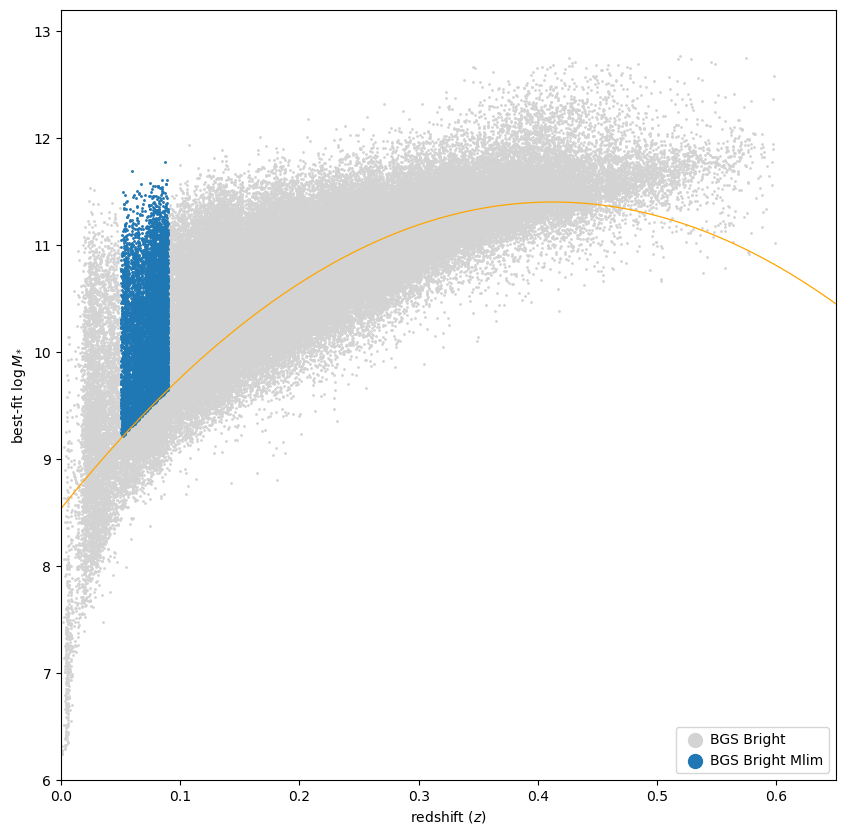

In [5]:
plt.figure(figsize=(10,10))
plotter.plot_selected_data(0.05, 0.09)

In [6]:
z, x, x_median, w_spec, vmax = bgs.select_galaxies(0.05, 0.09)

(0.04902184870217866, 0.09099955015970745)

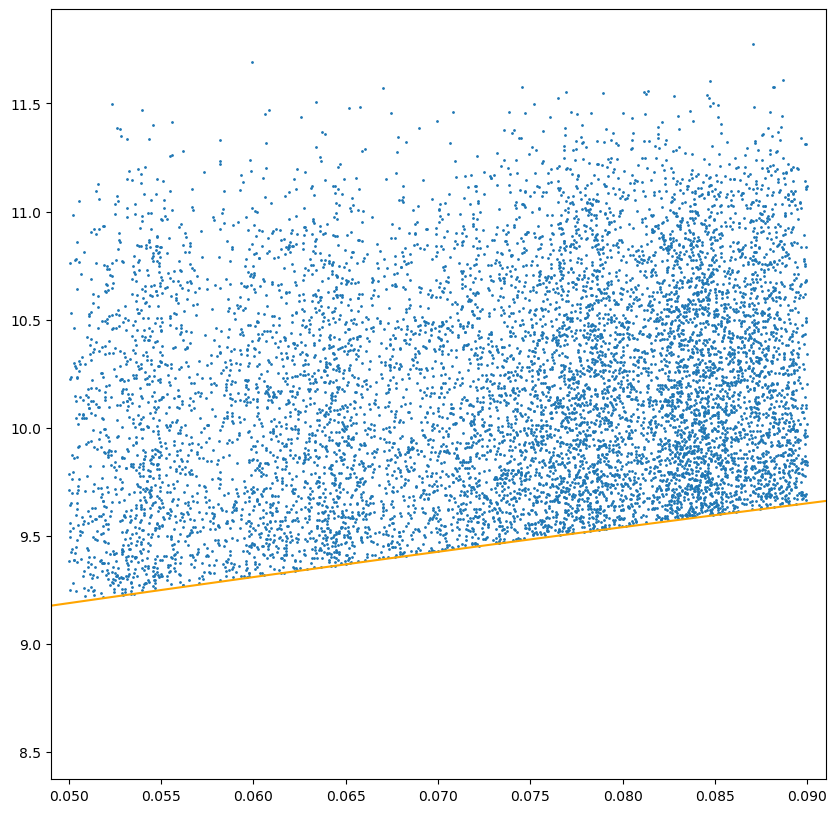

In [7]:
z_lin = np.linspace(0.,0.6, 100)
plt.figure(figsize=(10,10))
plt.scatter(z,x_median, s=1)
plt.plot(z_lin, bgs.mass_completeness_limit(z_lin), c='orange')
plt.xlim(z.min()-0.001, z.max()+0.001)

In [8]:
h, b = np.histogram(x_median, range=(6.,13.), weights=(w_spec/vmax), bins=40)

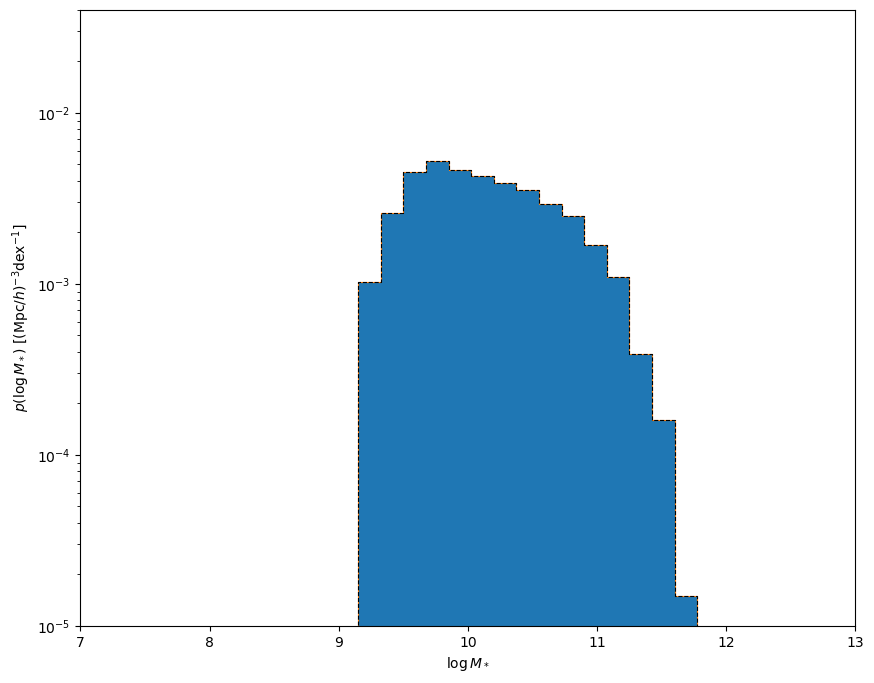

In [9]:
plt.figure(figsize=(10,8))
plt.hist(x_median, range=(6., 13.), weights=(w_spec/vmax), bins=40)
plotter.plot_vmax_hist(h, b, h, b)
# plt.plot(np.repeat(9.15, 100), np.linspace(-1000, +1000, 100))
# plt.plot(np.repeat(9.32, 100), np.linspace(-1000, +1000, 100))
# plt.plot(np.repeat(9.21, 100), np.linspace(-1000, +1000, 100))
plt.yscale('log')
plt.show()

In [10]:
list(zip(h,b))

[(0.0, 6.0),
 (0.0, 6.175),
 (0.0, 6.35),
 (0.0, 6.525),
 (0.0, 6.7),
 (0.0, 6.875),
 (0.0, 7.05),
 (0.0, 7.225),
 (0.0, 7.4),
 (0.0, 7.575),
 (0.0, 7.75),
 (0.0, 7.925),
 (0.0, 8.1),
 (0.0, 8.275),
 (0.0, 8.45),
 (0.0, 8.625),
 (0.0, 8.8),
 (0.0, 8.975),
 (0.0010199683428351975, 9.15),
 (0.0026002179695421707, 9.325),
 (0.0045164602779015585, 9.5),
 (0.005211994404592709, 9.675),
 (0.004631195759612991, 9.85),
 (0.004242425082369638, 10.024999999999999),
 (0.0038548742518588943, 10.2),
 (0.0035375056088107026, 10.375),
 (0.0029351923002461015, 10.55),
 (0.0024863476580777822, 10.725),
 (0.0016847656223118708, 10.899999999999999),
 (0.0010905457830815697, 11.075),
 (0.0003863536826650867, 11.25),
 (0.000159469586300376, 11.425),
 (1.495554157896974e-05, 11.6),
 (0.0, 11.774999999999999),
 (0.0, 11.95),
 (0.0, 12.125),
 (0.0, 12.3),
 (0.0, 12.475),
 (0.0, 12.649999999999999),
 (0.0, 12.825)]

In [11]:
x_median.min()

9.216810703277588

## Comparison $1/V_{max}$ - $\Phi(M_{*}, z)$ at different redshift bins

/Users/federico/Library/CloudStorage/OneDrive-UniversityCollegeLondon/PhD/PhD_project/bgs_psmf/nb/../VMaxDensity.py:19: RuntimeWarning: divide by zero encountered in divide
  _w = self.w_spec / (self.vmax.clip(v_zmin, v_zmax) - v_zmin)


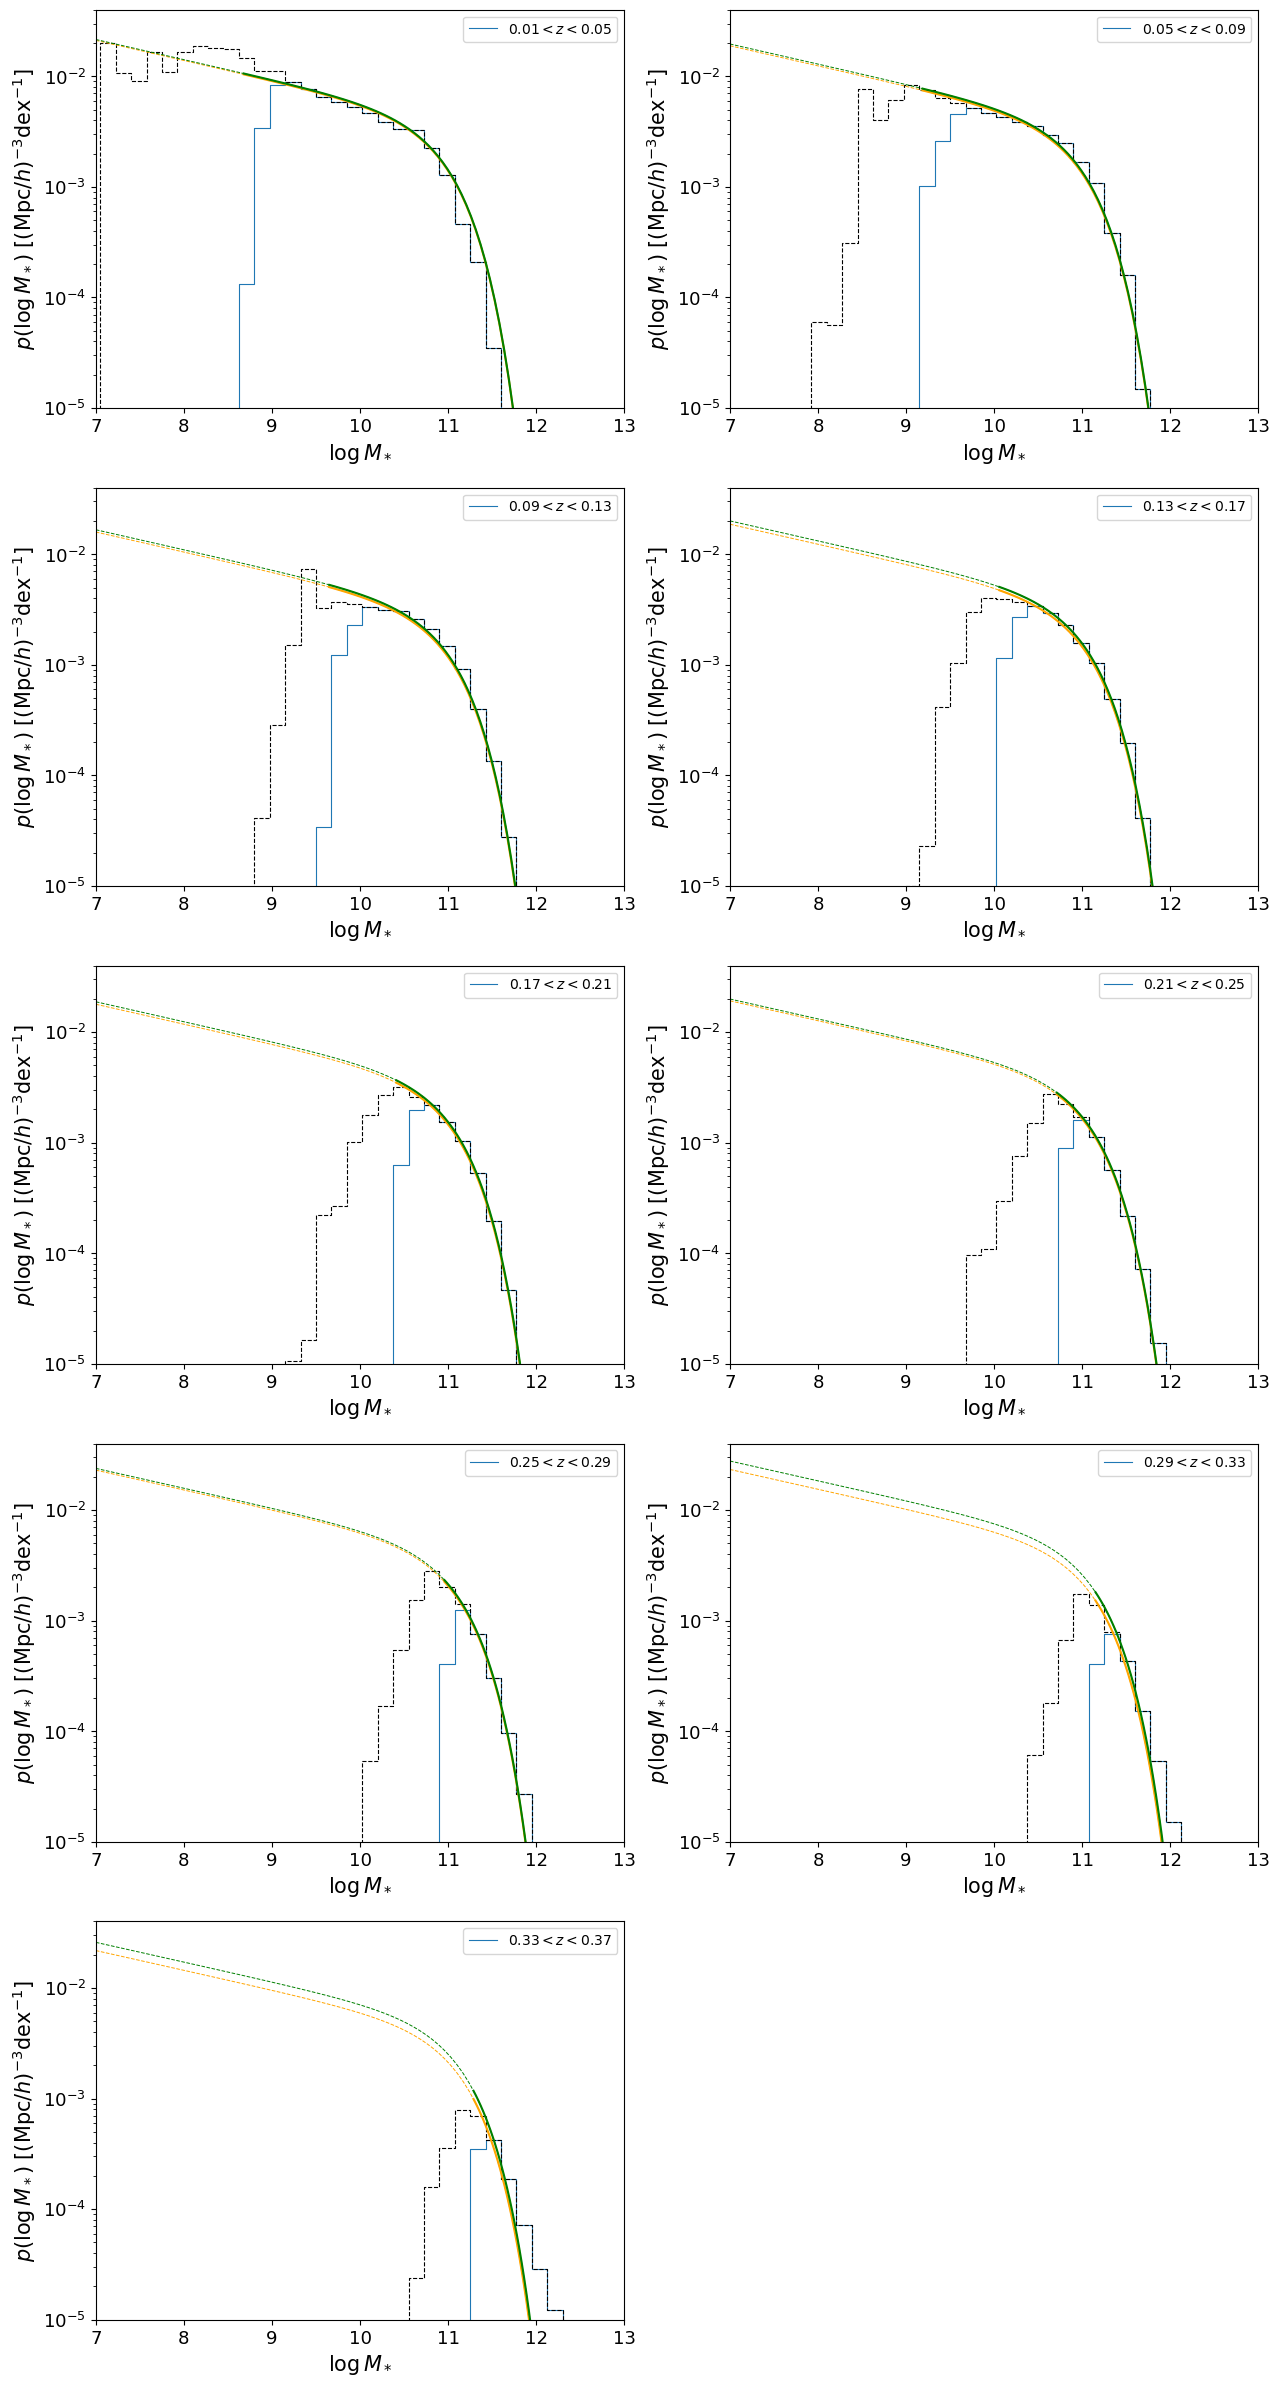

In [12]:
zmins = np.array([0.01 + 0.04 * i for i in range(9)])
zmaxs = np.array([0.05 + 0.04 * i for i in range(9)])

x_lin_ext = np.linspace(7, 14, 100)

fig = plt.figure(figsize=(15,30))

plot_params_ext = {'color': 'orange', 'linestyle':'--', 'linewidth':0.7}
plot_params = {'color':'orange', 'linestyle':'-'}

plot_params_ext2 = {'color': 'green', 'linestyle':'--', 'linewidth':0.7}
plot_params2 = {'color':'green', 'linestyle':'-'}

plot_params_ext3 = {'color': 'red', 'linestyle':'--', 'linewidth':0.7}
plot_params3 = {'color':'red', 'linestyle':'-'}

for i, zmin, zmax, z0 in zip(range(9), zmins, zmaxs, zmins + (zmaxs - zmins)/2.):
    plt.subplot(5,2,i+1)
    h, b, _h, _b = vmax_hist.histogram_norm(zmin, zmax)
    z_smf = ZSchechterModel(bgs, zmin, zmax, z0)
    
    n = z_smf.normalisation(best_params)
    n2 = z_smf.normalisation2(best_params)
    # n3 = z_smf.normalisation3(best_params)

    x_lin = np.linspace(z_smf.mlim.min(), 14, 100)
    # print(z_smf.mlim.min())
    plotter.plot_vmax_hist(h, b, _h, _b, **{'label':f'${zmin:.2f}< z <{zmax:.2f}$'})
    Plotter.plot_zschechter(x_lin, z0, n, best_params, **plot_params)
    Plotter.plot_zschechter(x_lin_ext, z0, n, best_params, **plot_params_ext)
    Plotter.plot_zschechter(x_lin, z0, n2, best_params, **plot_params2)
    Plotter.plot_zschechter(x_lin_ext, z0, n2, best_params, **plot_params_ext2)
    # Plotter.plot_zschechter(x_lin, z0, n3, best_params, **plot_params3)
    # Plotter.plot_zschechter(x_lin_ext, z0, n3, best_params, **plot_params_ext3)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.legend(loc='best')
plt.show()    

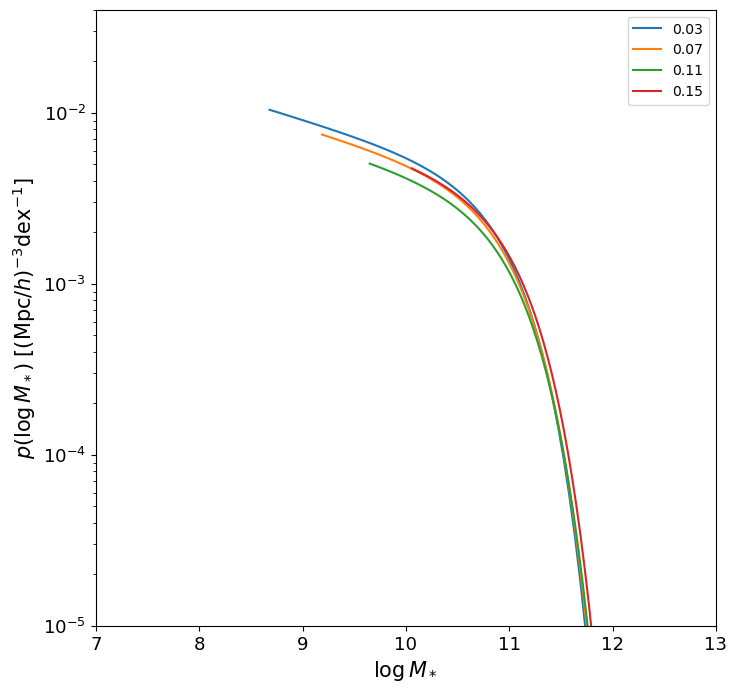

In [17]:
zmins = np.array([0.01 + 0.04 * i for i in range(4)])
zmaxs = np.array([0.05 + 0.04 * i for i in range(4)])

x_lin_ext = np.linspace(7, 14, 100)

fig = plt.figure(figsize=(8,8))



# plot_params_ext2 = {'color': 'green', 'linestyle':'--', 'linewidth':0.7}
# plot_params2 = {'color':'green', 'linestyle':'-'}

# plot_params_ext3 = {'color': 'red', 'linestyle':'--', 'linewidth':0.7}
# plot_params3 = {'color':'red', 'linestyle':'-'}

for i, zmin, zmax, z0 in zip(range(9), zmins, zmaxs, zmins + (zmaxs - zmins)/2.):

    z_smf = ZSchechterModel(bgs, zmin, zmax, z0)
    
    n = z_smf.normalisation(best_params)


    x_lin = np.linspace(z_smf.mlim.min(), 14, 100)

    plot_params_ext = {'color': f'C{i}', 'linestyle':'--', 'linewidth':0.7}
    plot_params = {'color':f'C{i}', 'linestyle':'-', 'label':f'{z0:.2f}'}
    
    Plotter.plot_zschechter(x_lin, z0, n, best_params, **plot_params)
    # Plotter.plot_zschechter(x_lin_ext, z0, n, best_params, **plot_params_ext)
    
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.legend(loc='best')
plt.show()    

In [14]:
phi = ZSchechterModel(bgs, 0.01, 0.05, 0.03)

In [15]:
from astropy.cosmology import Planck13
v_zmin = Planck13.comoving_volume(0.01).value * Planck13.h ** 3 * (173.641 / (4. * np.pi * (180 / np.pi) ** 2))
v_zmax = Planck13.comoving_volume(0.05).value * Planck13.h ** 3 * (173.641 / (4. * np.pi * (180 / np.pi) ** 2))
np.sum(phi.vmax) > v_zmax - v_zmin

True